# EDA Project

## Analysis on AI, ML, DS & Big Data Jobs

Scraped Data on AI, ML, DS & Big Data Jobs is a comprehensive dataset that includes valuable information about job opportunities in the fields of Artificial Intelligence (AI), Machine Learning (ML), Data Science (DS), and Big Data. The dataset covers various aspects, including company names, job titles, locations, job types (full-time, part-time, internship), experience levels, salary ranges, job requirements, and available facilities.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ipywidgets import interact
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\lenovo\OneDrive\Desktop\pgawd_23\data_science_job.csv", encoding='latin-1')

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3198 entries, 0 to 3197
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Company                     3197 non-null   object
 1   Job_Title                   3197 non-null   object
 2   Location                    3197 non-null   object
 3   Job_Type                    3197 non-null   object
 4   Experience_level            2962 non-null   object
 5   Salary                      3009 non-null   object
 6   Requirment_of_the_company   3198 non-null   object
 7   Facilities                  3198 non-null   object
dtypes: object(8)
memory usage: 200.0+ KB
None


In [4]:
df.head()

,Company,Job_Title,Location,Job_Type,Experience_level,Salary,Requirment_of_the_company,Facilities
0,SGS,Clinical Data Analyst,"Richardson, TX, United States",Full Time,Entry-level,48K+ *,"Computer Science,Data quality,Genetics,Mathema...",",,,,"
1,Ocorian,AML/CFT & Data Analyst,"Ebène, Mauritius",Full Time,Entry-level,48K+ *,"Agile,Data management,Finance,Security,,",",,,,"
2,Cricut,Machine Learning Engineer,"South Jordan, UT, United States",Full Time,NaN,90K+ *,"Agile,Architecture,AWS,Computer Science,Comput...","Career development,,,,"
3,Bosch Group,Application Developer & Data Analyst,"Nonantola, Italy",Full Time,Entry-level,48K+ *,"Engineering,Industrial,Oracle,Power BI,R,R&D",",,,,"
4,Publicis Groupe,Data Engineer Full time (Public Sector) USA,"Arlington, VA, United States",Full Time,Mid-level,108K+,"AWS,Azure,Computer Science,Consulting,Dataflow...","Flex hours,Flex vacation,Parental leave,Unlimi..."


In [5]:
df.shape

(3198, 8)

In [6]:
pd.DataFrame(list(df))

,0
0,Company
1,Job_Title
2,Location
3,Job_Type
4,Experience_level
5,Salary
6,Requirment_of_the_company
7,Facilities


In [7]:
df.describe()

,Company,Job_Title,Location,Job_Type,Experience_level,Salary,Requirment_of_the_company,Facilities
count,3197,3197,3197,3197,2962,3009,3198,3198
unique,1106,2138,1117,3,4,218,2600,777
top,Publicis Groupe,Data Engineer,"Bengaluru, India",Full Time,Senior-level,115K+ *,"Big Data,Business Intelligence,Data analysis,E...",",,,,"
freq,126,105,90,3116,1876,253,12,542


## Missing value treatment

In [8]:
df.isnull().sum()

Company                         1
Job_Title                       1
Location                        1
Job_Type                        1
Experience_level              236
Salary                        189
Requirment_of_the_company       0
Facilities                      0
dtype: int64

In [9]:
(df.isnull().sum()).sort_values(ascending = False)

Experience_level              236
Salary                        189
Company                         1
Job_Title                       1
Location                        1
Job_Type                        1
Requirment_of_the_company       0
Facilities                      0
dtype: int64

In [10]:
df.isnull().sum()*100/len(df)

Company                       0.031270
Job_Title                     0.031270
Location                      0.031270
Job_Type                      0.031270
Experience_level              7.379612
Salary                        5.909944
Requirment_of_the_company     0.000000
Facilities                    0.000000
dtype: float64

In [11]:
def check_missing(x):
    x=x.isnull().sum()*100/len(x)
    x=x[x>0]
    x=x.sort_values(ascending=False)
    return x

check_missing(df)

Experience_level    7.379612
Salary              5.909944
Company             0.031270
Job_Title           0.031270
Location            0.031270
Job_Type            0.031270
dtype: float64

In [12]:
df.Experience_level.describe()

count             2962
unique               4
top       Senior-level
freq              1876
Name: Experience_level, dtype: object

<Axes: xlabel='Experience_level', ylabel='Count'>

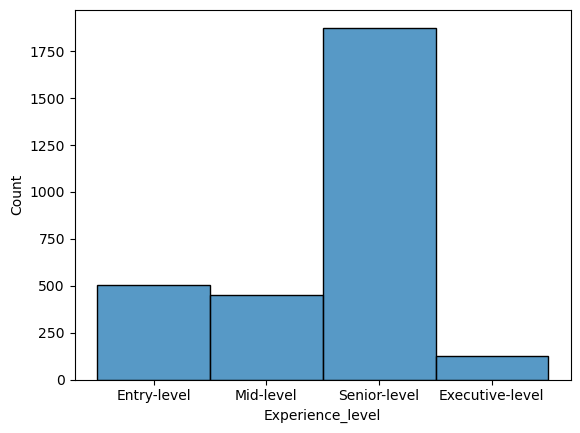

In [13]:
sns.histplot(df['Experience_level'])

In [14]:
df.Experience_level= df.Experience_level.fillna('Senior-level')

In [15]:
check_missing(df)

Salary       5.909944
Company      0.031270
Job_Title    0.031270
Location     0.031270
Job_Type     0.031270
dtype: float64

In [16]:
df.Salary.head()

0     48K+ *
1     48K+ *
2     90K+ *
3     48K+ *
4      108K+
Name: Salary, dtype: object

In [17]:
df['Salary'] = df['Salary'].str.replace('[^\d.]', '', regex=True)

##here regex indicates that the pattern is a regular expression.
## [^\d.] is a regular expression pattern that matches any character that is not a digit (\d) or a decimal point (.)

In [18]:
df['Salary'] = pd.to_numeric(df['Salary'])

In [19]:
df.Salary.head()

0     48.0
1     48.0
2     90.0
3     48.0
4    108.0
Name: Salary, dtype: float64

In [20]:
type(df.Salary[0])

numpy.float64

In [21]:
df.Salary.describe()

count    3009.000000
mean       90.241276
std        42.689763
min        30.000000
25%        56.000000
50%        77.000000
75%       115.000000
max       315.000000
Name: Salary, dtype: float64

In [22]:
df.Salary=df.Salary.fillna(77)

In [23]:
check_missing(df)

Company      0.03127
Job_Title    0.03127
Location     0.03127
Job_Type     0.03127
dtype: float64

In [24]:
df.Company.describe()

count                3197
unique               1106
top       Publicis Groupe
freq                  126
Name: Company, dtype: object

In [25]:
df.Company=df.Company.fillna('Publicis Groupe')

In [26]:
check_missing(df)

Job_Title    0.03127
Location     0.03127
Job_Type     0.03127
dtype: float64

In [27]:
df.Job_Title.describe()

count              3197
unique             2138
top       Data Engineer
freq                105
Name: Job_Title, dtype: object

In [28]:
df.Job_Title=df.Job_Title.fillna('Data Engineer')

In [29]:
check_missing(df)

Location    0.03127
Job_Type    0.03127
dtype: float64

In [30]:
df.Location.describe()

count                 3197
unique                1117
top       Bengaluru, India
freq                    90
Name: Location, dtype: object

In [31]:
df.Location=df.Location.fillna('Bengaluru, India')

In [32]:
check_missing(df)

Job_Type    0.03127
dtype: float64

In [33]:
df.Job_Type.describe()

count          3197
unique            3
top       Full Time
freq           3116
Name: Job_Type, dtype: object

In [34]:
df.Job_Type=df.Job_Type.fillna('Full Time')

In [35]:
check_missing(df)

Series([], dtype: float64)

In [36]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3198 entries, 0 to 3197
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Company                     3198 non-null   object 
 1   Job_Title                   3198 non-null   object 
 2   Location                    3198 non-null   object 
 3   Job_Type                    3198 non-null   object 
 4   Experience_level            3198 non-null   object 
 5   Salary                      3198 non-null   float64
 6   Requirment_of_the_company   3198 non-null   object 
 7   Facilities                  3198 non-null   object 
dtypes: float64(1), object(7)
memory usage: 200.0+ KB
None


## Explorartory Data Analysis (EDA)

In [37]:
df.head()

,Company,Job_Title,Location,Job_Type,Experience_level,Salary,Requirment_of_the_company,Facilities
0,SGS,Clinical Data Analyst,"Richardson, TX, United States",Full Time,Entry-level,48.0,"Computer Science,Data quality,Genetics,Mathema...",",,,,"
1,Ocorian,AML/CFT & Data Analyst,"Ebène, Mauritius",Full Time,Entry-level,48.0,"Agile,Data management,Finance,Security,,",",,,,"
2,Cricut,Machine Learning Engineer,"South Jordan, UT, United States",Full Time,Senior-level,90.0,"Agile,Architecture,AWS,Computer Science,Comput...","Career development,,,,"
3,Bosch Group,Application Developer & Data Analyst,"Nonantola, Italy",Full Time,Entry-level,48.0,"Engineering,Industrial,Oracle,Power BI,R,R&D",",,,,"
4,Publicis Groupe,Data Engineer Full time (Public Sector) USA,"Arlington, VA, United States",Full Time,Mid-level,108.0,"AWS,Azure,Computer Science,Consulting,Dataflow...","Flex hours,Flex vacation,Parental leave,Unlimi..."


### Traget variable -> Salary

In [38]:
df.Salary.describe()

count    3198.000000
mean       89.458724
std        41.526269
min        30.000000
25%        59.000000
50%        77.000000
75%       115.000000
max       315.000000
Name: Salary, dtype: float64

In [39]:
num_cols = [col for col in df.columns if col not in df.select_dtypes('O').columns]
num_cols

['Salary']

## Salary

<Axes: ylabel='Salary'>

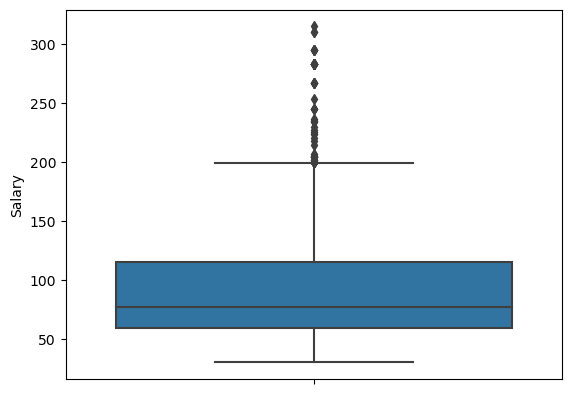

In [40]:
sns.boxplot(y='Salary',data=df)

***The current data showcase that we have larger population having salary between 60K to 120k USD  and we have outliers from 200k to 300k USD & above***

## Experience_level

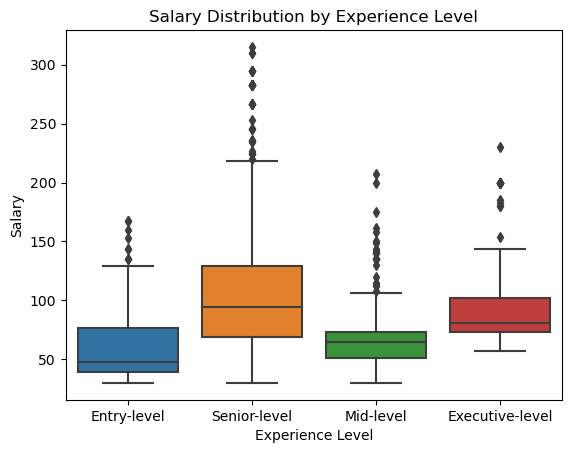

In [41]:
# Create a box plot to visualize the distribution of salaries based on 'Experience_level'
sns.boxplot(x='Experience_level', y='Salary', data=df)
plt.xlabel('Experience Level')
plt.ylabel('Salary')
plt.title('Salary Distribution by Experience Level')
plt.show()

***From above distribution we can say that Senior-level professionals are highly valued, this indicates a demand for experienced professionals in the job market.***

## Job Type

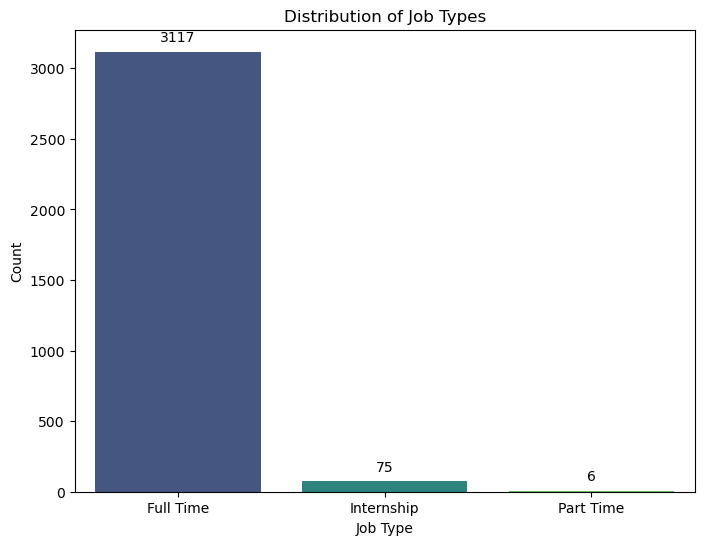

In [42]:
job_type_counts = df['Job_Type'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=job_type_counts.index, y=job_type_counts.values, palette='viridis')

# Add count labels to each bar
for i, count in enumerate(job_type_counts.values):
    plt.text(i, count + 50, str(count), ha='center', va='bottom', fontsize=10)

plt.xlabel('Job Type')
plt.ylabel('Count')
plt.title('Distribution of Job Types')
plt.show()


***From above barplot we get count for each Job_type***

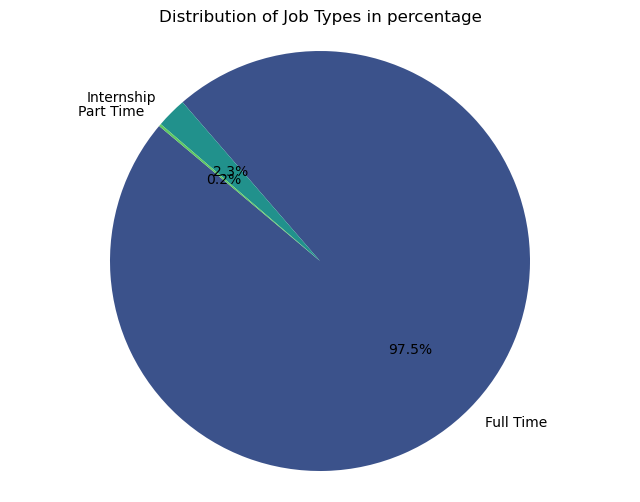

In [60]:
# Calculate job type counts
job_type_counts = df['Job_Type'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(job_type_counts, labels=job_type_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(job_type_counts)))

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Distribution of Job Types in percentage')
plt.show()

***From above piechart we get percentage for each Job_type***

<Axes: xlabel='Salary', ylabel='Count'>

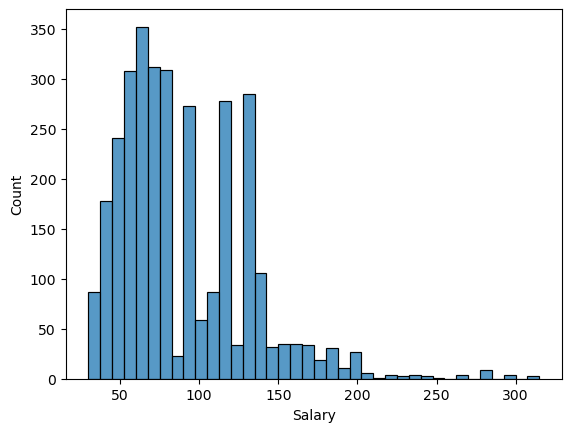

In [75]:
sns.histplot(df.Salary)
plt.show()

Text(0.5, 1.0, 'Salary Distribution among Job Types')

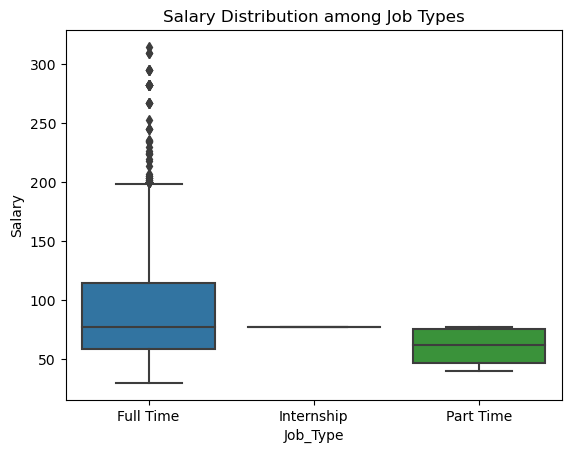

In [43]:
sns.boxplot(x='Job_Type',y='Salary',data=df)
# Set the title of the chart
plt.title('Salary Distribution among Job Types')
plt.show()

***Above boxplot shows that full-time positions offer higher salary levels compared to Internships and Part time employees.***

## Experience_level and Job_type

Text(0.5, 1.0, 'Salary Distribution by Experience Level and Job Type')

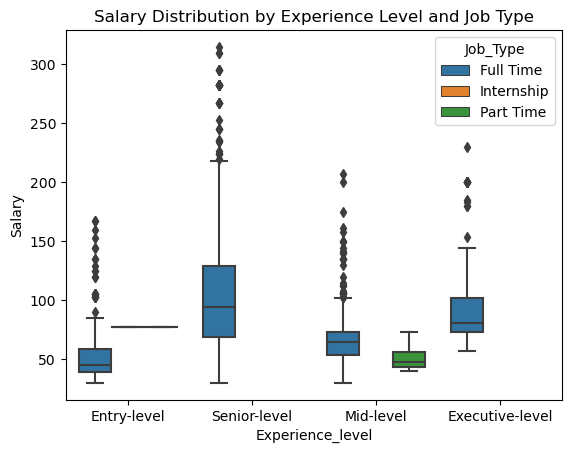

In [44]:
sns.boxplot(x='Experience_level',y='Salary',data=df,hue='Job_Type')

# Set the title of the chart
plt.title('Salary Distribution by Experience Level and Job Type')
plt.show()

***Above bar plot clearly shows that individuals with "Full Time" employment status and "Senior-Level" and "Executive Level" experience tend to have the highest salaries. This suggests that there is a positive correlation between experience level and salary, particularly for those in full-time positions.***

## Top 10 Locations with Higher Salary Levels

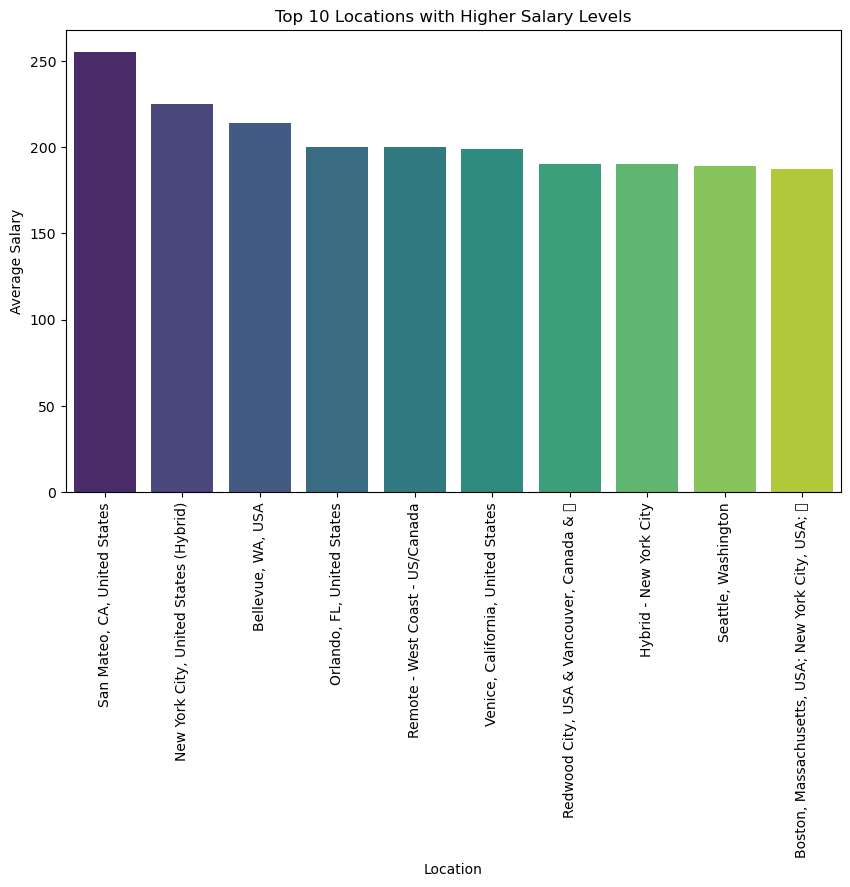

In [45]:
# Grouping locations by their salaries
location_salaries = df.groupby('Location')['Salary'].mean().reset_index()

# Sorting the locations by average salary in descending order
location_salaries = location_salaries.sort_values('Salary', ascending=False)

# Extracting the top 10 locations with higher salary levels
top_locations = location_salaries.head(10)

# Plotting a bar chart to visualize the top 10 locations with higher salary levels
plt.figure(figsize=(10, 6))
sns.barplot(x='Location', y='Salary', data=top_locations, palette='viridis')
plt.xlabel('Location')
plt.ylabel('Average Salary')
plt.title('Top 10 Locations with Higher Salary Levels')
plt.xticks(rotation=90)
plt.show()


## Bottom 10 Locations with Lower Salary Levels

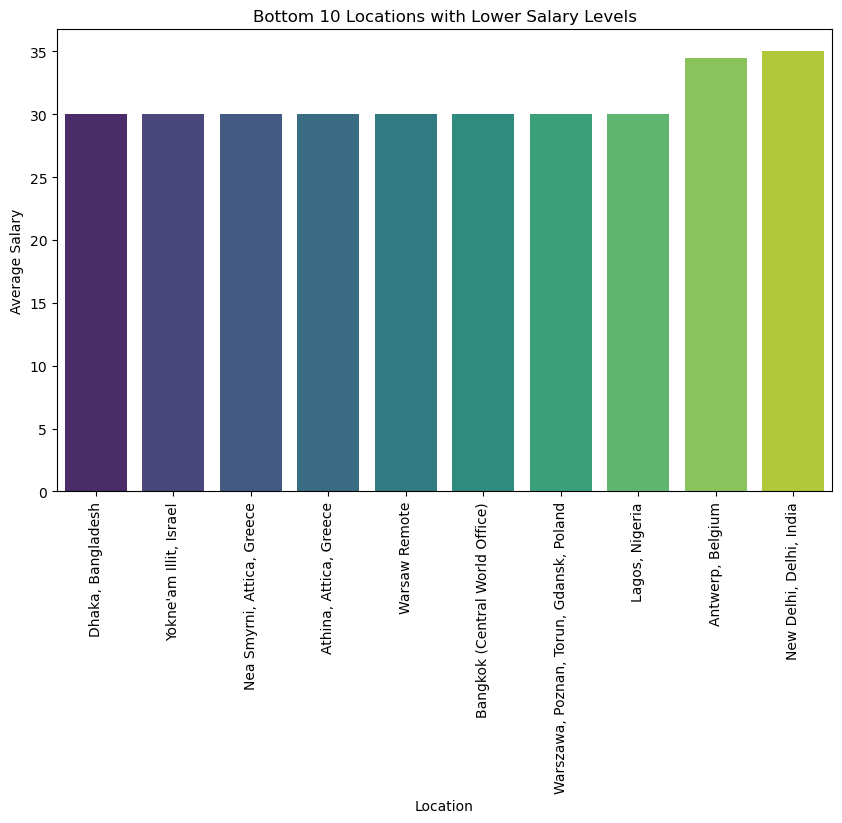

In [46]:
# Grouping locations by their salaries
location_salaries = df.groupby('Location')['Salary'].mean().reset_index()

# Sorting the locations by average salary in ascending order
location_salaries = location_salaries.sort_values('Salary', ascending=True)

# Extracting the bottom 10 locations with lower salary levels
bottom_locations = location_salaries.head(10)

# Plotting a bar chart to visualize the bottom 10 locations with lower salary levels
plt.figure(figsize=(10, 6))
sns.barplot(x='Location', y='Salary', data=bottom_locations, palette='viridis')
plt.xlabel('Location')
plt.ylabel('Average Salary')
plt.title('Bottom 10 Locations with Lower Salary Levels')
plt.xticks(rotation=90)
plt.show()


## Top 10 Companies with Higher Salary Levels

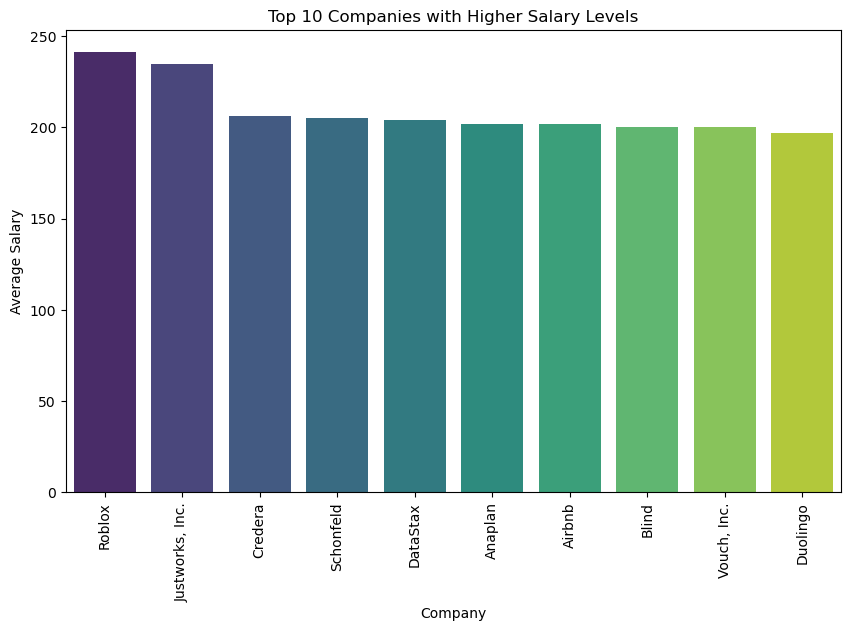

In [47]:
# Grouping companies by their average salary
company_salaries = df.groupby('Company')['Salary'].mean().reset_index()

# Sorting the companies by average salary in descending order
top_10_companies = company_salaries.nlargest(10, 'Salary')

# Plotting a bar chart to visualize top 10 companies with higher salary levels
plt.figure(figsize=(10, 6))
sns.barplot(x='Company', y='Salary', data=top_10_companies, palette='viridis')
plt.xlabel('Company')
plt.ylabel('Average Salary')
plt.title('Top 10 Companies with Higher Salary Levels')
plt.xticks(rotation=90)
plt.show()


## Bottom 10 Companies with Lower Salary Levels

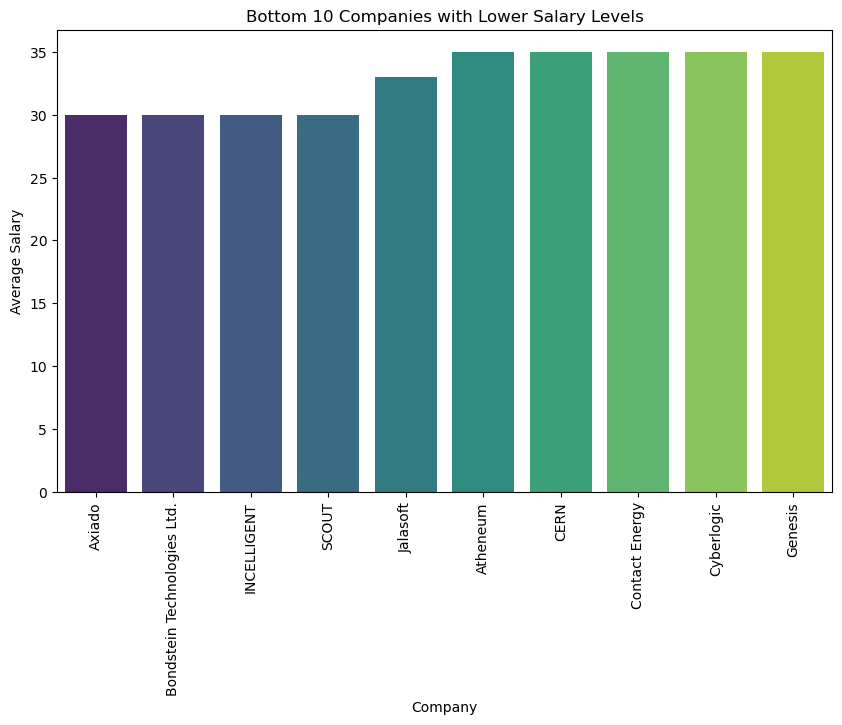

In [48]:
# Grouping companies by their average salary
company_salaries = df.groupby('Company')['Salary'].mean().reset_index()

# Sorting the companies by average salary in ascending order
bottom_10_companies = company_salaries.nsmallest(10, 'Salary')

# Plotting a bar chart to visualize the bottom 10 companies with lower salary levels
plt.figure(figsize=(10, 6))
sns.barplot(x='Company', y='Salary', data=bottom_10_companies, palette='viridis')
plt.xlabel('Company')
plt.ylabel('Average Salary')
plt.title('Bottom 10 Companies with Lower Salary Levels')
plt.xticks(rotation=90)
plt.show()


## Salary Distribution among Top 10 Job Titles

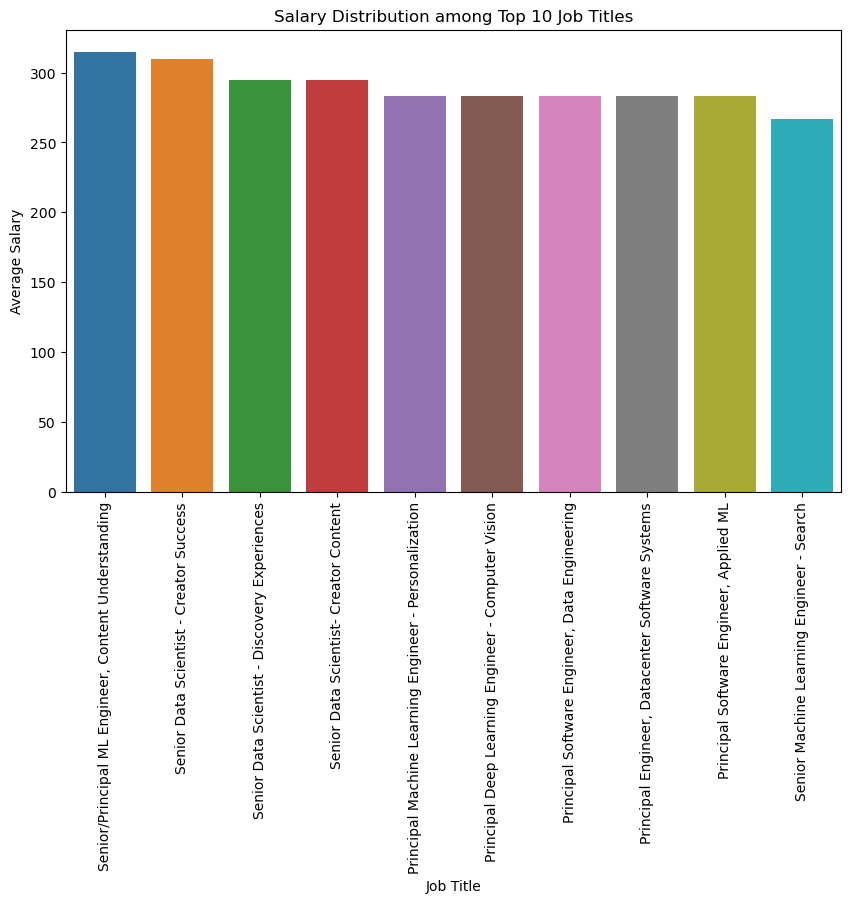

In [49]:
# Group the data by 'Job_Title' and calculate the average salary
job_salaries = df.groupby('Job_Title')['Salary'].mean().reset_index()

# Sort the job titles by average salary in descending order
job_salaries = job_salaries.sort_values('Salary', ascending=False)

# Select the top 10 job titles with higher salaries
top_job_titles = job_salaries.head(10)

# Plot a bar chart to visualize the salary distribution among the top 10 job titles
plt.figure(figsize=(10, 6))
sns.barplot(x='Job_Title', y='Salary', data=top_job_titles)
plt.xlabel('Job Title')
plt.ylabel('Average Salary')
plt.title('Salary Distribution among Top 10 Job Titles')
plt.xticks(rotation=90)
plt.show()


***1) Above bar plot indicates Senior-level roles are associated with the highest average salaries among the job titles considered.***

***2)Also Technical roles such as Data Scientist and Machine Learning Engineer are also among the top job titles with higher salary levels. This suggests that specialized skills in fields like data science and  Machine Learning are highly valued.***

## Salary Distribution among Bottom 10 Job Titles

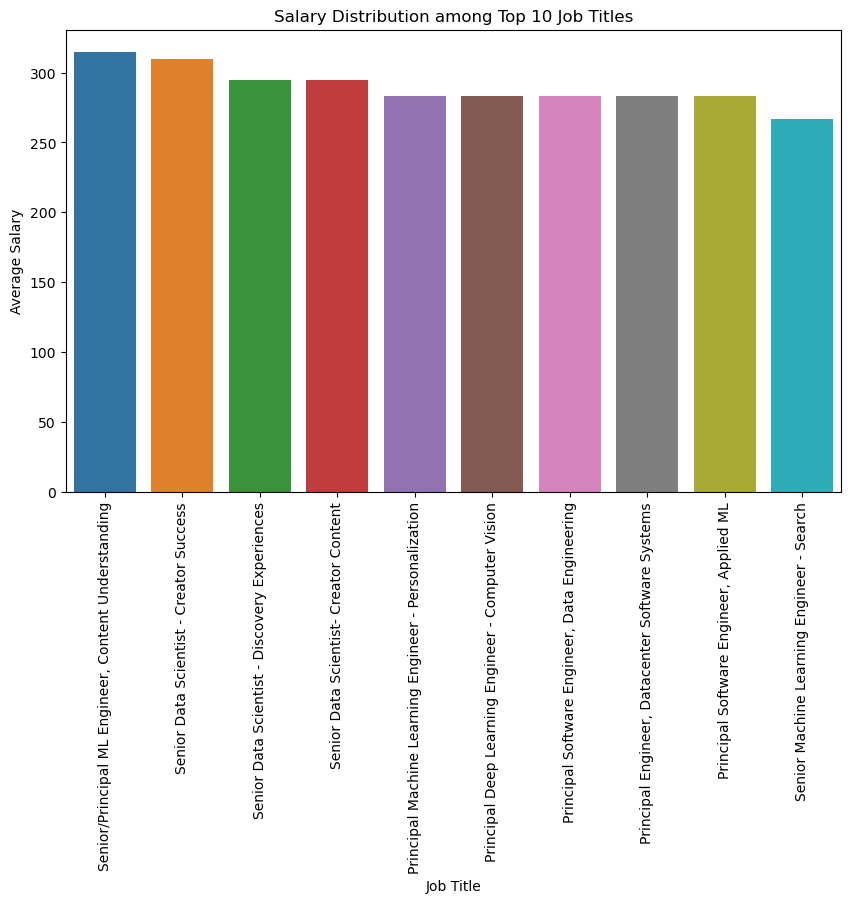

In [50]:
# Group the data by 'Job_Title' and calculate the average salary
job_salaries = df.groupby('Job_Title')['Salary'].mean().reset_index()

# Sort the job titles by average salary in descending order
job_salaries = job_salaries.sort_values('Salary', ascending=False)

# Select the top 10 job titles with higher salaries
top_job_titles = job_salaries.head(10)

# Plot a bar chart to visualize the salary distribution among the top 10 job titles
plt.figure(figsize=(10, 6))
sns.barplot(x='Job_Title', y='Salary', data=top_job_titles)
plt.xlabel('Job Title')
plt.ylabel('Average Salary')
plt.title('Salary Distribution among Top 10 Job Titles')
plt.xticks(rotation=90)
plt.show()


## Salary Distribution among Bottom 25 Job Titles

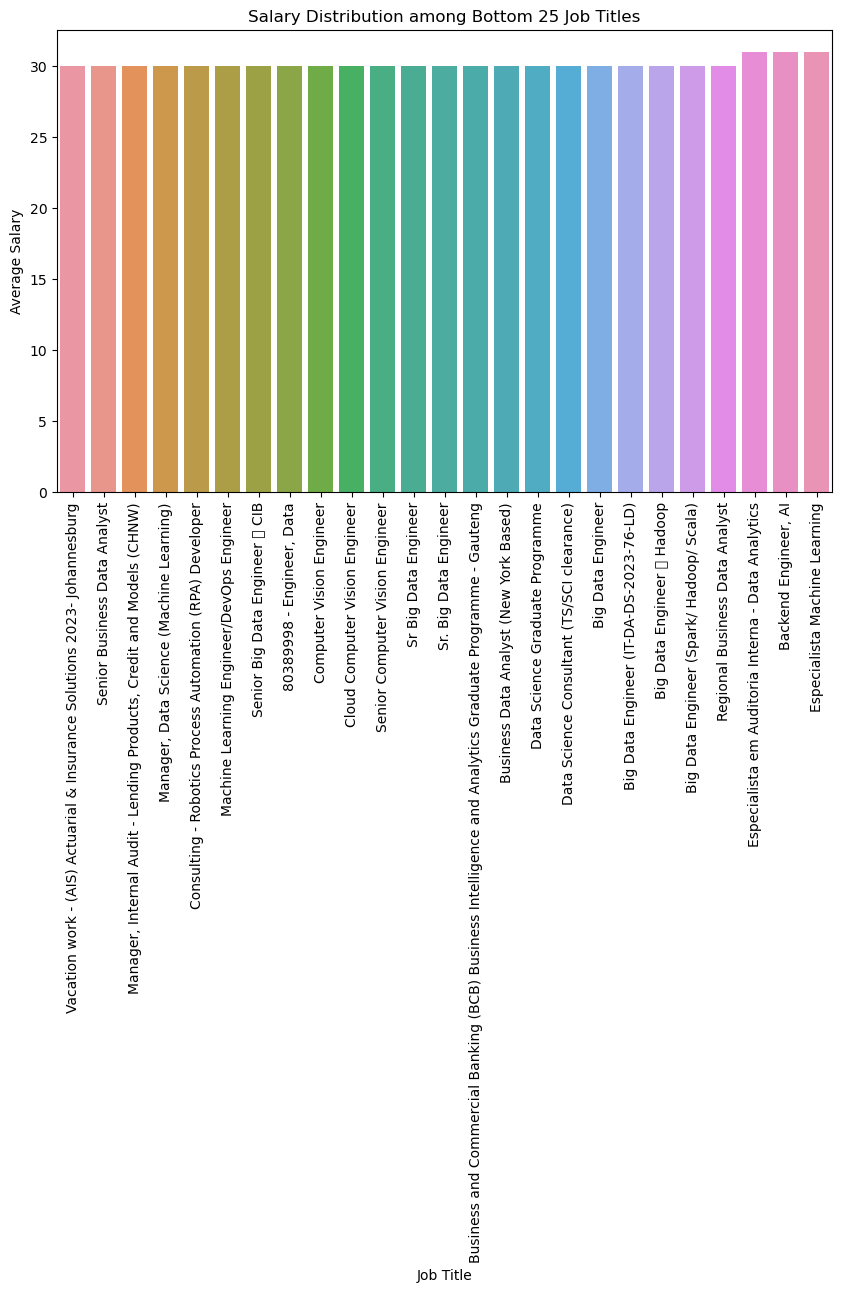

In [70]:
# Group the data by 'Job_Title' and calculate the average salary
job_salaries = df.groupby('Job_Title')['Salary'].mean().reset_index()

# Sort the job titles by average salary in ascending order
job_salaries = job_salaries.sort_values('Salary', ascending=True)

# Select the bottom 10 job titles with lower salaries
bottom_job_titles = job_salaries.head(25)

# Plot a bar chart to visualize the salary distribution among the bottom 10 job titles
plt.figure(figsize=(10, 6))
sns.barplot(x='Job_Title', y='Salary', data=bottom_job_titles)
plt.xlabel('Job Title')
plt.ylabel('Average Salary')
plt.title('Salary Distribution among Bottom 25 Job Titles')
plt.xticks(rotation=90)
plt.show()

***Above distribution shows 22 companies having same lowest average salary***

### All Insights

***1) The current data showcase that we have larger population having salary between 60K to 120k USD  and we have outliers from 200k to 300k USD & above***

***2) Senior-level professionals are highly valued, this indicates a demand for experienced professionals in the job market.***

***3) Full-time positions offer higher salary levels compared to Internships and Part time employees.***

***4) From count of Job_type we observed that count of Full time jobs are much higher than Internships & Part-Time jobs***

***5) Idividuals with "Full Time" employment status and "Senior-Level" and "Executive Level" experience tend to have the highest salaries. This suggests that there is a positive correlation between experience level and salary, particularly for those in full-time positions.***

***6) Senior-level roles are associated with the highest average salaries among the job titles considered.***